In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-cursos/alura-clustering-validation/base-de-dados/CC%20GENERAL.csv"

df = pd.read_csv(url)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
### Pré processamento

# drop das colunas não interessantes para análise
df.drop(columns=["CUST_ID", "TENURE"], inplace=True) # inplace: modifica o df sem precisa atribuir a outro

missing_data = df.isna().sum() ## Dados nulos
print(missing_data)

"""
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64
"""

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


'\nBALANCE                               0\nBALANCE_FREQUENCY                     0\nPURCHASES                             0\nONEOFF_PURCHASES                      0\nINSTALLMENTS_PURCHASES                0\nCASH_ADVANCE                          0\nPURCHASES_FREQUENCY                   0\nONEOFF_PURCHASES_FREQUENCY            0\nPURCHASES_INSTALLMENTS_FREQUENCY      0\nCASH_ADVANCE_FREQUENCY                0\nCASH_ADVANCE_TRX                      0\nPURCHASES_TRX                         0\nCREDIT_LIMIT                          1\nPAYMENTS                              0\nMINIMUM_PAYMENTS                    313\nPRC_FULL_PAYMENT                      0\ndtype: int64\n'

Temos 313 casos em que o Minimum Payment é nulo, podemos substituir os nulos pela mediana:

In [ ]:
df = df.fillna(df.median()) ## substitui os nulos pela mediana

missing_data = df.isna().sum() ## Dados nulos
print(missing_data) ## nenhum nulo

"""
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64
"""

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


'\nBALANCE                             0\nBALANCE_FREQUENCY                   0\nPURCHASES                           0\nONEOFF_PURCHASES                    0\nINSTALLMENTS_PURCHASES              0\nCASH_ADVANCE                        0\nPURCHASES_FREQUENCY                 0\nONEOFF_PURCHASES_FREQUENCY          0\nPURCHASES_INSTALLMENTS_FREQUENCY    0\nCASH_ADVANCE_FREQUENCY              0\nCASH_ADVANCE_TRX                    0\nPURCHASES_TRX                       0\nCREDIT_LIMIT                        0\nPAYMENTS                            0\nMINIMUM_PAYMENTS                    0\nPRC_FULL_PAYMENT                    0\ndtype: int64\n'

In [ ]:
## Normalização dos dados:
from sklearn.preprocessing import Normalizer

valores = Normalizer().fit_transform(df.values)

print(valores) ## valores normalizados entre 0 e 1

"""
[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]
  """

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


'\n[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01\n  1.34239194e-01 0.00000000e+00]\n [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01\n  9.84037959e-02 2.03923046e-05]\n [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02\n  7.81351982e-02 0.00000000e+00]\n ...\n [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02\n  8.02156174e-02 2.43318384e-04]\n [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01\n  1.09898221e-01 4.92767391e-04]\n [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02\n  4.41568390e-02 0.00000000e+00]]\n  '

In [ ]:
## Geração dos grupos

from sklearn.cluster import KMeans

agrupador = KMeans(n_clusters = 5, n_init = 10, max_iter = 300)
y_pred = agrupador.fit_predict(valores)
labels = agrupador.labels_

print(y_pred) #[2 4 2 ... 2 2 3]

[3 2 3 ... 3 3 0]


In [ ]:
## Validação com coeficiente silhouette
## O coeficiente de silhueta mede a separação dos clusteres
## um valor maior que 0 é considerado bom, sendo que os valores podem
## variar de -1 até 1
from sklearn.metrics import silhouette_score

s_score = silhouette_score(valores, labels, metric='euclidean')

print(s_score) #0.364439277430815

0.3644026320471113


In [ ]:
## Validação Davies-Bouldin
## Mede a similaridade entre dois clusters
## Valores menores indicam melhor clusterização
## Valor minimo de 0

from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(valores, labels)

print(db_score) #1.075878703157104

1.0758234649933398


In [ ]:
## Validação Calinski-Harabasz
## Verifica a dispersão dos pontos dentro de um cluster e entre clusters
## Valor alto é melhor

from sklearn.metrics import calinski_harabasz_score

ch_score = calinski_harabasz_score(valores, labels)

print(ch_score) #3431.782548172111

3431.784380848988


Temos várias métricas (Silhouete, Davies-Bouldin e Calinski-Harabasz), mas como sabemos se esses scores são bons ou ruins?

Podemos variar o número de clusters no algoritmo KMeans e comparar com os resultados dos algoritmos de validação.

In [ ]:
## Método que muda os parâmetros do KMeans e retorna as 3 métricas

def KMeans_with_metrics(qtd_clusters, valores):
    kmeans = KMeans(n_clusters = qtd_clusters, n_init = 10, max_iter = 300)
    kmeans.fit_predict(valores)
    labels = kmeans.labels_

    s = silhouette_score(valores, labels, metric='euclidean')
    db = davies_bouldin_score(valores, labels)
    ch = calinski_harabasz_score(valores, labels)

    return s, db, ch

In [ ]:
silhouette, davies_bouldin, calinski_harabasz = KMeans_with_metrics(3, valores)
print("3 Clusters")
print("Índice Silhouette: ", silhouette)
print("Índice Davies-Bouldin: ", davies_bouldin)
print("Índice Calinski-Harabasz: ", calinski_harabasz)

3 Clusters
Índice Silhouette:  0.3271378885807343
Índice Davies-Bouldin:  1.3101739173194826
Índice Calinski-Harabasz:  3526.452465937179


In [ ]:
silhouette, davies_bouldin, calinski_harabasz = KMeans_with_metrics(5, valores)
print("5 Clusters")
print("Índice Silhouette: ", silhouette)
print("Índice Davies-Bouldin: ", davies_bouldin)
print("Índice Calinski-Harabasz: ", calinski_harabasz)

5 Clusters
Índice Silhouette:  0.36454314826693845
Índice Davies-Bouldin:  1.075812734747931
Índice Calinski-Harabasz:  3431.800540734651


In [ ]:
silhouette, davies_bouldin, calinski_harabasz = KMeans_with_metrics(10, valores)
print("10 Clusters")
print("Índice Silhouette: ", silhouette)
print("Índice Davies-Bouldin: ", davies_bouldin)
print("Índice Calinski-Harabasz: ", calinski_harabasz)

10 Clusters
Índice Silhouette:  0.3051646586238816
Índice Davies-Bouldin:  1.157106322884955
Índice Calinski-Harabasz:  3017.5366644731475


Podemos comparar também com uma estrutura de dados aleatórios:

In [ ]:
len(df) # 8950

# temos 8950 instancias com 16 variáveis, normalizado de -1 a 1

import numpy as np

random_data = np.random.rand(8950, 16)

silhouette_random, davies_bouldin_random, calinski_harabasz_random = KMeans_with_metrics(5, random_data)

print("5 Clusters dados aleatórios")
print("Índice Silhouette: ", silhouette_random)
print("Índice Davies-Bouldin: ", davies_bouldin_random)
print("Índice Calinski-Harabasz: ", calinski_harabasz_random)

5 Clusters dados aleatórios
Índice Silhouette:  0.04006331558807878
Índice Davies-Bouldin:  3.4993029673361407
Índice Calinski-Harabasz:  304.6237121683111


Validando a estabilidade do cluster:

Vamos dividir a base de dados em partes e rodar o algoritmo KMeans para cada uma das partes, verificando se elas se comportam da mesma maneira.

In [ ]:
## divisao dos dados:

parte1, parte2, parte3 = np.array_split(valores, 3)

print(len(parte1))
print(len(parte2))
print(len(parte3))

2984
2983
2983


In [ ]:
## KMeans com a primeira parte dos dados

s1, db1, ch1 = KMeans_with_metrics(5, parte1)

print("5 Clusters primeiro conjunto de dados")
print("Índice Silhouette: ", s1)
print("Índice Davies-Bouldin: ", db1)
print("Índice Calinski-Harabasz: ", ch1)

5 Clusters primeiro conjunto de dados
Índice Silhouette:  0.3692455604046628
Índice Davies-Bouldin:  1.0550439720459237
Índice Calinski-Harabasz:  1203.9722444846889


In [ ]:
## KMeans com a segunda parte dos dados

s2, db2, ch2 = KMeans_with_metrics(5, parte1)

print("5 Clusters segundo conjunto de dados")
print("Índice Silhouette: ", s2)
print("Índice Davies-Bouldin: ", db2)
print("Índice Calinski-Harabasz: ", ch2)

5 Clusters segundo conjunto de dados
Índice Silhouette:  0.36908155221853256
Índice Davies-Bouldin:  1.0580445685596034
Índice Calinski-Harabasz:  1204.0558494933455


In [ ]:
## KMeans com a terceira parte dos dados

s3, db3, ch3 = KMeans_with_metrics(5, parte1)

print("5 Clusters terceiro conjunto de dados")
print("Índice Silhouette: ", s3)
print("Índice Davies-Bouldin: ", db3)
print("Índice Calinski-Harabasz: ", ch3)

5 Clusters terceiro conjunto de dados
Índice Silhouette:  0.36910234441238604
Índice Davies-Bouldin:  1.0563597851946391
Índice Calinski-Harabasz:  1203.9861920496883


Gerando gráficos:

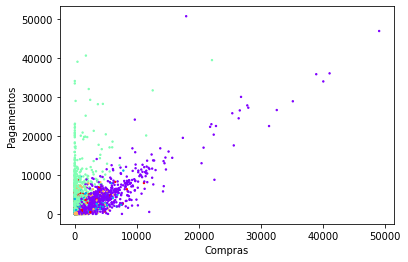

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#df_normalizado = pd.DataFrame(data = valores, columns = df.keys())

## Atributos para analisar: Purchase e Payments
# sns.scatterplot(df['PURCHASES'], df['PAYMENTS'], hue=labels)
plt.scatter(x = df['PURCHASES'], y = df['PAYMENTS'], c = labels, s = 2, cmap = 'rainbow')
plt.xlabel("Compras")
plt.ylabel("Pagamentos")
plt.show()

Reduzindo o número de dimensões para analisar os dados:

In [ ]:
df["cluster"] = labels ## Inclusao das labels no df
df.groupby("cluster").describe()

BALANCE                            ... PRC_FULL_PAYMENT               
          count         mean          std  ...              50%       75%  max
cluster                                    ...                                
0        1544.0  1144.749900  1670.581114  ...         0.083333  0.545455  1.0
1        2648.0  3036.222685  2477.688065  ...         0.000000  0.000000  0.6
2        1072.0  1794.024195  1982.950586  ...         0.083333  0.142857  1.0
3        3275.0   444.146902   846.930394  ...         0.000000  0.444444  1.0
4         411.0  1987.501586  1854.459156  ...         0.000000  0.000000  1.0

[5 rows x 128 columns]

In [ ]:
## Valor do centroide para cada atributo em cada cluster

centroides = agrupador.cluster_centers_

print(centroides)

[[1.59970277e-01 2.45420653e-04 4.37832758e-01 2.56342445e-01
  1.81661269e-01 2.57701902e-02 2.04632150e-04 8.87805917e-05
  1.51042337e-04 9.36227386e-06 1.69268877e-04 6.17437812e-03
  6.04822057e-01 4.02343053e-01 8.52508929e-02 7.25704005e-05]
 [5.04120176e-01 2.72279423e-04 6.16154059e-02 3.61332045e-02
  2.55039227e-02 2.53213629e-01 6.73145543e-05 2.56928004e-05
  4.50515920e-05 5.74730416e-05 1.15776055e-03 1.32966204e-03
  7.19195953e-01 1.66119756e-01 1.79220769e-01 5.52512128e-07]
 [2.35141479e-01 2.16555293e-04 6.03857074e-02 3.44170171e-02
  2.59739049e-02 4.00128071e-01 5.26401668e-05 2.04882397e-05
  3.51921361e-05 6.54864556e-05 1.57199032e-03 1.12217156e-03
  5.35089146e-01 5.98040052e-01 1.04348171e-01 2.77498236e-05]
 [6.91174009e-02 2.30606539e-04 1.21226581e-01 4.79772863e-02
  7.33497068e-02 2.41947578e-02 1.72617514e-04 3.36929404e-05
  1.40042773e-04 7.92242513e-06 1.23760508e-04 2.85805113e-03
  9.43803334e-01 1.53494462e-01 5.68407863e-02 7.58440293e-05]
 [3.

Como pode ser visto, o primeiro atributo de cada cluster é bem diferente entre clusters. Já o segundo atributo é bem parecido entre os clusters. Isso pode significar que o primeiro atributo é bem interessante para diferenciar os clusters.

Dessa forma, selecionamos os atributos com maior variância:

In [ ]:
tam = len(centroides[0]) ## primeiro cluster

for i in range(tam):
    ## Variancia entre o atributo i em todos os clusteres ([:,i]) 
    variancia = centroides[:, i].var() ## .var() -> variância
    print(df.columns.values[i], "\n{:.4f}".format(variancia))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0196
ONEOFF_PURCHASES 
0.0076
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0226
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0280
MINIMUM_PAYMENTS 
0.0542
PRC_FULL_PAYMENT 
0.0000


In [ ]:
## Por convenção, pegaremos os atributos com variância maior que 0.01:

atributos_selecionados = []

for i in range(tam):
    ## Variancia entre o atributo i em todos os clusteres ([:,i]) 
    variancia = centroides[:, i].var() ## .var() -> variância
    
    if variancia > 0.01:
        atributos_selecionados.append(df.columns.values[i])

atributos_selecionados.append("cluster")
print(atributos_selecionados)

['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'cluster']


In [ ]:
df[atributos_selecionados].groupby('cluster').describe()

BALANCE               ... MINIMUM_PAYMENTS              
          count         mean  ...              75%           max
cluster                       ...                               
0        1544.0  1144.749900  ...       524.184580  18621.013310
1        2648.0  3036.222685  ...      1330.437428   8345.641905
2        1072.0  1794.024195  ...       884.718306  21235.065300
3        3275.0   444.146902  ...       248.968369   4483.503862
4         411.0  1987.501586  ...      7112.618584  76406.207520

[5 rows x 48 columns]

In [ ]:
df_selecionado = df[atributos_selecionados].groupby('cluster') ## df dos atributos selecionados agrupado por cluster

qtd_clientes_cluster = df_selecionado.size()
print(qtd_clientes_cluster)

cluster
0    1544
1    2648
2    1072
3    3275
4     411
dtype: int64


In [ ]:
df_selecionado_media = df_selecionado.mean()
df_selecionado_media['qtd_clientes'] = qtd_clientes_cluster
df_selecionado_media

## Médias de cada atributo para cada cluster e a quantidade de clientes por cluster

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,qtd_clientes
cluster,,,,,,,
0,1144.749900,3265.474754,182.614490,4101.334295,3034.867347,541.949671,1544
1,3036.222685,383.621779,1637.535381,4492.371601,967.448625,1021.871946,2648
2,1794.024195,475.494823,3270.246792,3976.372399,4709.556601,734.234709,1072
3,444.146902,628.970831,141.666342,5135.052448,814.094493,228.625597,3275
4,1987.501586,854.865815,421.129352,2227.737226,1336.238911,6042.286901,411


Continua na Parte 2...